___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and **the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.** 

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
sns.set()

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (12,8)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_columns', None)

In [309]:
df0 = pd.read_csv('Churn_Modelling.csv')
df = df0.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [310]:
df.shape

(10000, 14)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [312]:
df.isnull().sum().any()

False

In [313]:
df.duplicated().sum()

0

In [314]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0000,5000.5000,2886.8957,1.0000,2500.7500,5000.5000,7500.2500,10000.0000
CustomerId,10000.0000,15690940.5694,71936.1861,15565701.0000,15628528.2500,15690738.0000,15753233.7500,15815690.0000
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800


The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- `*` **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

In [315]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0000,1,1,1,101348.8800,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.8600,1,0,1,112542.5800,0
2,3,15619304,Onio,502,France,Female,42,8,159660.8000,3,1,0,113931.5700,1
3,4,15701354,Boni,699,France,Female,39,1,0.0000,2,0,0,93826.6300,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.8200,1,1,1,79084.1000,0


## RowNumber

In [316]:
df = df.drop('RowNumber', axis = 1)

## CustomerId

In [317]:
df = df.drop('CustomerId', axis = 1)

## Surname

In [318]:
df = df.drop('Surname', axis = 1)

## CreditScore

In [319]:
import plotly.express as px 
fig = px.histogram(df['CreditScore'], nbins=60, marginal="box",  opacity=0.75)
fig.show()

## Geography

In [320]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

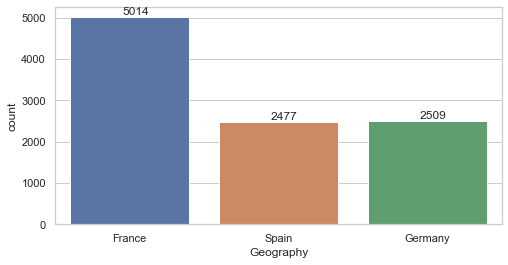

In [321]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["Geography"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

## Gender

In [322]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

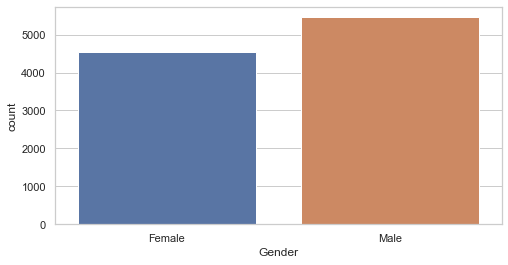

In [323]:
sns.countplot(df["Gender"]);

## Age

In [324]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [325]:
fig = px.histogram(df['Age'], nbins=60, marginal="box",  opacity=0.75)
fig.show()

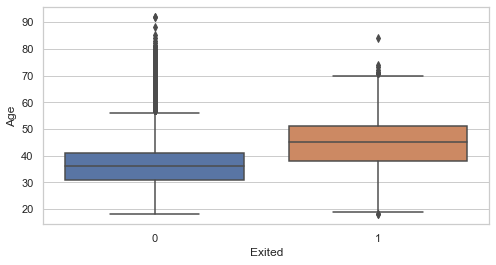

In [326]:
sns.boxplot(x = 'Exited', y = 'Age', data = df);

## Tenure

In [327]:
# The number of years for which the customer has been with the bank.
df['Tenure'].value_counts(dropna = False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [328]:
fig = px.histogram(df['Tenure'], marginal="box",  opacity=0.75)
fig.show()

## Balance

In [329]:
df['Balance'].value_counts(dropna = False)

0.0000         3617
130170.8200       2
105473.7400       2
85304.2700        1
159397.7500       1
               ... 
81556.8900        1
112687.6900       1
108698.9600       1
238387.5600       1
130142.7900       1
Name: Balance, Length: 6382, dtype: int64

In [330]:
fig = px.histogram(df['Balance'], nbins=60, marginal="box",  opacity=0.75)
fig.show()

## NumOfProducts

In [331]:
df['NumOfProducts'].value_counts(dropna = False)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

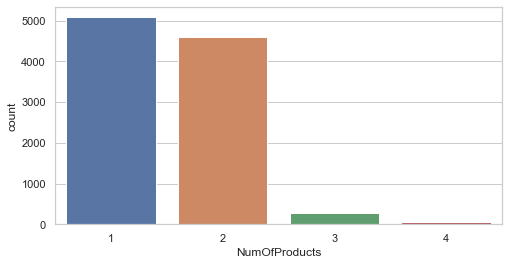

In [332]:
sns.countplot(df['NumOfProducts']);

## HasCrCard

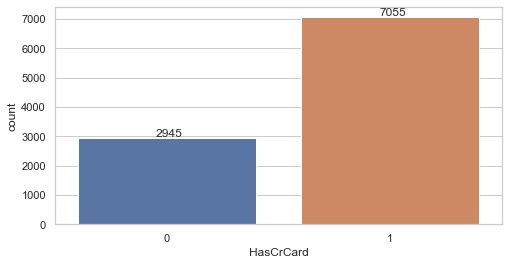

In [333]:
# number of credit cards 
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["HasCrCard"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

## IsActiveMember

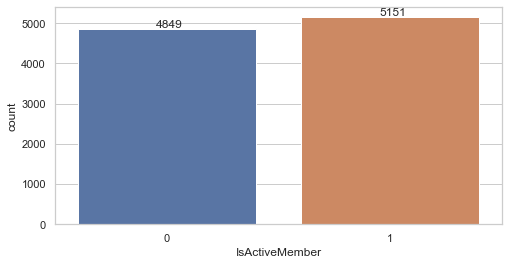

In [334]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["IsActiveMember"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

## EstimatedSalary

In [335]:
fig = px.histogram(df['EstimatedSalary'], nbins=100, marginal="box",  opacity=0.75)
fig.show()

## Exited

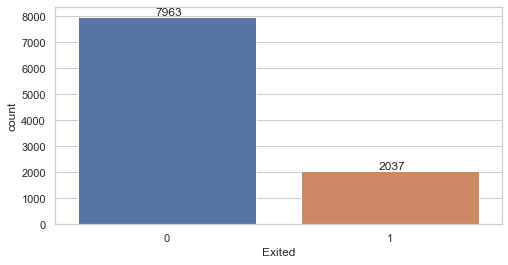

In [336]:
plt.rcParams["figure.figsize"] = (8, 4)
ax = sns.countplot(df["Exited"])
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

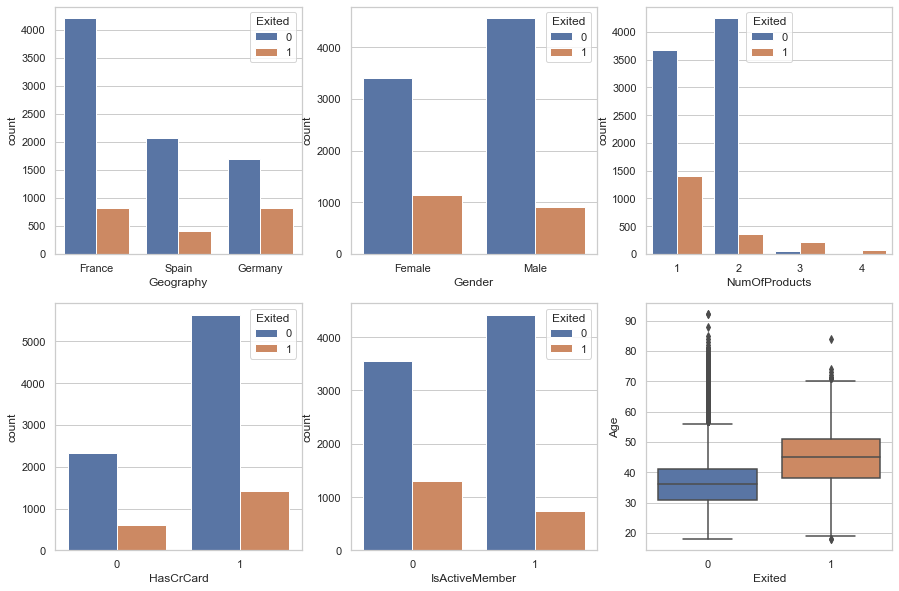

In [337]:
category = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]
index = 0
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i in category:
    index += 1
    plt.subplot(2, 3, index)
    sns.countplot(data=df, x=i, hue="Exited")

sns.boxplot(x='Exited', y='Age', data=df, ax=axes[1,2]);

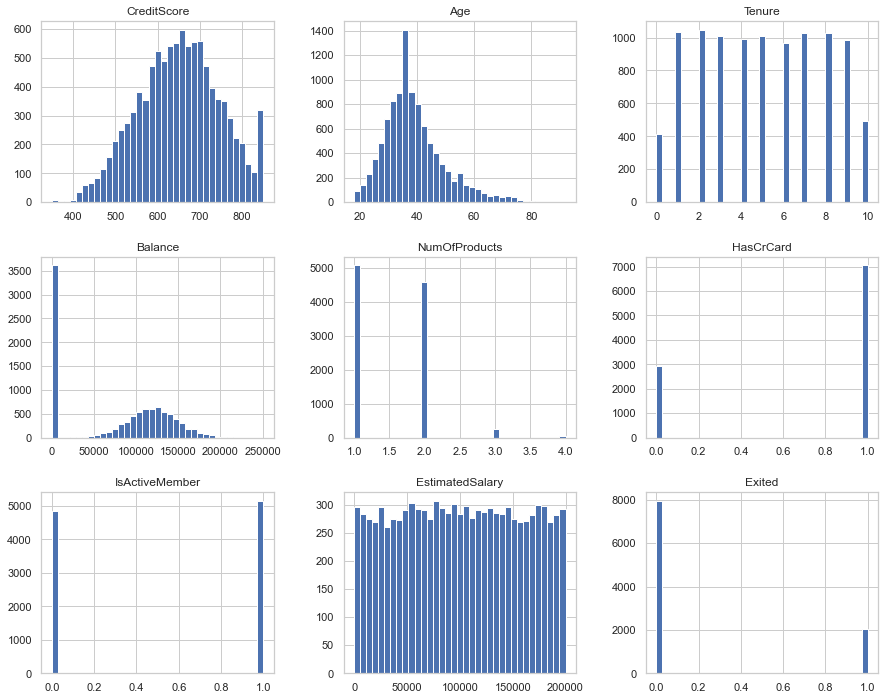

In [73]:
df.hist(figsize=(15, 12), bins=35);

In [338]:
df.corr()[['Exited']].sort_values(by='Exited', ascending=False)

,Exited
Exited,1.0000
Age,0.2853
Balance,0.1185
EstimatedSalary,0.0121
HasCrCard,-0.0071
Tenure,-0.0140
CreditScore,-0.0271
NumOfProducts,-0.0478
IsActiveMember,-0.1561


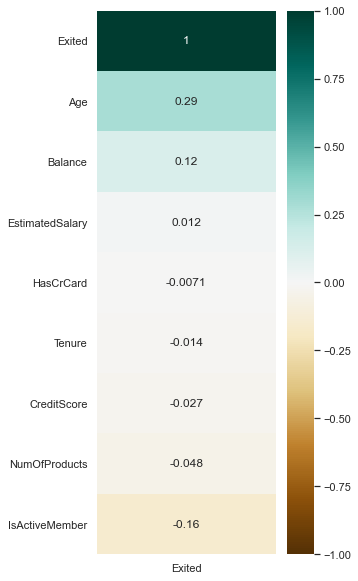

In [339]:
# for the target variable
plt.figure(figsize=(4, 10))
sns.heatmap(data=df.corr()[['Exited']].sort_values(by='Exited', ascending=False),
            vmin = -1, vmax = 1, 
            annot=True, 
            cmap='BrBG');


## Dummy

In [340]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0000,1,1,1,101348.8800,1,0,0,0
1,608,41,1,83807.8600,1,0,1,112542.5800,0,0,1,0
2,502,42,8,159660.8000,3,1,0,113931.5700,1,0,0,0
3,699,39,1,0.0000,2,0,0,93826.6300,0,0,0,0
4,850,43,2,125510.8200,1,1,1,79084.1000,0,0,1,0


In [341]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0000,650.5288,96.6533,350.0000,584.0000,652.0000,718.0000,850.0000
Age,10000.0000,38.9218,10.4878,18.0000,32.0000,37.0000,44.0000,92.0000
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,76485.8893,62397.4052,0.0000,0.0000,97198.5400,127644.2400,250898.0900
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,100090.2399,57510.4928,11.5800,51002.1100,100193.9150,149388.2475,199992.4800
Exited,10000.0000,0.2037,0.4028,0.0000,0.0000,0.0000,0.0000,1.0000
Geography_Germany,10000.0000,0.2509,0.4336,0.0000,0.0000,0.0000,1.0000,1.0000


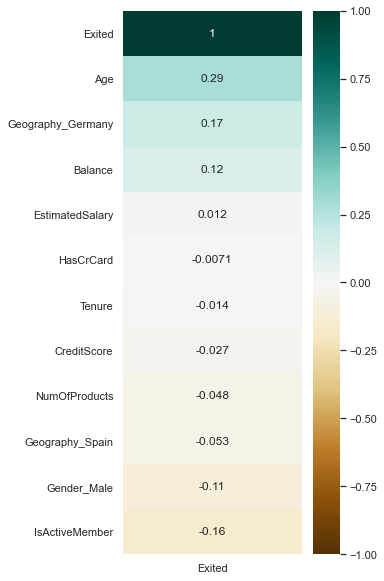

In [342]:
plt.figure(figsize=(4, 10))
sns.heatmap(data=df.corr()[['Exited']].sort_values(by='Exited', ascending=False),
            vmin = -1, vmax = 1, 
            annot=True, 
            cmap='BrBG');

# Preprocessing of Data
- Train | Test Split, Scalling

In [412]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [413]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [414]:
seed = 101

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=seed)

In [416]:
from sklearn.preprocessing import MinMaxScaler 

In [417]:
scaler = MinMaxScaler()

In [418]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [419]:
print(X_train.shape)
print(X_test.shape)

(9000, 11)
(1000, 11)


# Modelling & Model Performance

## without class_weigth

In [420]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix

In [421]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [422]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

- **Activation:** <a href="https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/" target="_blank">How to Choose an Activation Function for Deep Learning</a> 
- **Hidden Layer:** <a href="https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/" target="_blank">Choosing number of Hidden Layers and number of hidden neurons in Neural Networks</a> 
<br>*The most appropriate number of hidden neurons is `sqrt(input layer nodes x output layer nodes)`*<br>
- *First hidden layer `input layer nodes x 1.5`*
---
- **loss:** <a href="https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/" target="_blank">How to Choose Loss Functions When Training Deep Learning Neural Networks</a>
- **metrics:** <a href="https://keras.io/api/metrics/classification_metrics/" target="_blank">Choosing Classification metrics based on True/False positives & negative</a>


In [423]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Accuracy'])

# - accuracy:  ratio of number of correct predictions,  It is useful when all classes are of equal importance.
# - If the goal is to detect all the positive samples (without caring whether negative samples
# would be misclassified as positive), then use recall.
# - Use precision if the problem is sensitive to classifying a sample as Positive in general, i.e. 
# including Negative samples that were falsely classified as Positive.

In [424]:
model.weights

[<tf.Variable 'dense_79/kernel:0' shape=(11, 16) dtype=float32, numpy=
 array([[-0.02496374, -0.22216189, -0.4590583 , -0.24820021, -0.00340647,
          0.2683902 ,  0.45741627,  0.19408217, -0.11391607, -0.2638993 ,
          0.2015141 ,  0.3585575 ,  0.33938047, -0.09717098, -0.04024169,
         -0.19884366],
        [ 0.3834103 ,  0.12050101,  0.08189908, -0.3680364 , -0.08690095,
          0.32570353,  0.4374673 , -0.29709697, -0.10897815,  0.0625622 ,
          0.22558632,  0.36786857, -0.44758043,  0.09789845,  0.39727452,
          0.05636111],
        [ 0.14469555,  0.06275365,  0.46489456,  0.26229838, -0.2988079 ,
          0.04060945, -0.46463844,  0.22434428, -0.43105966, -0.1175507 ,
         -0.12524301,  0.3819699 ,  0.12055233,  0.4515898 , -0.24108504,
          0.2997786 ],
        [ 0.29824063, -0.04744229, -0.22745419, -0.25769663, -0.03320453,
         -0.36965573,  0.06546316,  0.0134761 , -0.08012331,  0.0626637 ,
          0.02225938, -0.33195317, -0.37954047

In [425]:
from tensorflow.keras.callbacks import EarlyStopping

**Early stopping** is a feature that enables the training to be automatically stopped when a chosen metric has stopped improving. <br><a href="https://medium.com/zero-equals-false/early-stopping-to-avoid-overfitting-in-neural-network-keras-b68c96ed05d9" target="_blank">Early Stopping to avoid overfitting in neural network-Keras</a> <br>
<br><a href="https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/" target="_blank">Use Early Stopping to Halt the Training of Neural Networks At the Right Time</a> <br>


- **Monitor:** Performance measure to monitor in order to end training 
- **Mode:**  argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).
- **patience**: This is the number of epochs without improvement after which training will be early stopped

In [426]:
early_stop = EarlyStopping(monitor="val_loss", # performance will be monitored on validation split
                           mode="auto",
                           verbose=1,
                           patience=20,
                           restore_best_weights=True)

In [427]:
Epochs = 1000
Batch=153

In [428]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/1000
50/50 [==============================] - 1s 5ms/step - loss: 0.9993 - Accuracy: 0.2141 - val_loss: 0.7474 - val_Accuracy: 0.2800
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6356 - Accuracy: 0.6642 - val_loss: 0.5504 - val_Accuracy: 0.8081
Epoch 3/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.5195 - Accuracy: 0.7952 - val_loss: 0.4871 - val_Accuracy: 0.8089
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4887 - Accuracy: 0.7950 - val_loss: 0.4742 - val_Accuracy: 0.8089
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4812 - Accuracy: 0.7956 - val_loss: 0.4695 - val_Accuracy: 0.8089
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4752 - Accuracy: 0.7958 - val_loss: 0.4657 - val_Accuracy: 0.8119
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4694 - Accuracy: 0.7942 - val_loss: 0.4611 - val_Accuracy: 0.8067
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.3470 - Accuracy: 0.8557 - val_loss: 0.3536 - val_Accuracy: 0.8548
Epoch 59/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3465 - Accuracy: 0.8550 - val_loss: 0.3528 - val_Accuracy: 0.8570
Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3464 - Accuracy: 0.8567 - val_loss: 0.3530 - val_Accuracy: 0.8548
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3461 - Accuracy: 0.8565 - val_loss: 0.3519 - val_Accuracy: 0.8556
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3461 - Accuracy: 0.8553 - val_loss: 0.3548 - val_Accuracy: 0.8556
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3462 - Accuracy: 0.8556 - val_loss: 0.3537 - val_Accuracy: 0.8570
Epoch 64/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.3459 - Accuracy: 0.8557 - val_loss: 0.3534 - val_Accuracy: 0.8548
Epoch 65/1000

50/50 [==============================] - 0s 2ms/step - loss: 0.3388 - Accuracy: 0.8614 - val_loss: 0.3471 - val_Accuracy: 0.8630
Epoch 116/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3397 - Accuracy: 0.8584 - val_loss: 0.3467 - val_Accuracy: 0.8637
Epoch 117/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3388 - Accuracy: 0.8600 - val_loss: 0.3470 - val_Accuracy: 0.8622
Epoch 118/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3384 - Accuracy: 0.8603 - val_loss: 0.3466 - val_Accuracy: 0.8615
Epoch 119/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3382 - Accuracy: 0.8612 - val_loss: 0.3473 - val_Accuracy: 0.8600
Epoch 120/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3384 - Accuracy: 0.8583 - val_loss: 0.3482 - val_Accuracy: 0.8637
Epoch 121/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3378 - Accuracy: 0.8614 - val_loss: 0.3462 - val_Accuracy: 0.8659
Epoch 1

Epoch 172/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3313 - Accuracy: 0.8637 - val_loss: 0.3469 - val_Accuracy: 0.8593
Epoch 173/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3312 - Accuracy: 0.8646 - val_loss: 0.3454 - val_Accuracy: 0.8593
Epoch 174/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3312 - Accuracy: 0.8650 - val_loss: 0.3453 - val_Accuracy: 0.8622
Epoch 175/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3314 - Accuracy: 0.8643 - val_loss: 0.3478 - val_Accuracy: 0.8615
Epoch 176/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3309 - Accuracy: 0.8630 - val_loss: 0.3453 - val_Accuracy: 0.8630
Epoch 177/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3304 - Accuracy: 0.8616 - val_loss: 0.3465 - val_Accuracy: 0.8593
Epoch 178/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3302 - Accuracy: 0.8651 - val_loss: 0.3440 - val_Accuracy:

Epoch 229/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3237 - Accuracy: 0.8685 - val_loss: 0.3443 - val_Accuracy: 0.8615
Epoch 230/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.3233 - Accuracy: 0.8685 - val_loss: 0.3463 - val_Accuracy: 0.8593
Epoch 230: early stopping


In [429]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 16)                192       
                                                                 
 dense_80 (Dense)            (None, 8)                 136       
                                                                 
 dense_81 (Dense)            (None, 4)                 36        
                                                                 
 dense_82 (Dense)            (None, 1)                 5         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [430]:
loss_df = pd.DataFrame(model.history.history) 
loss_df.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.9993,0.2141,0.7474,0.2800
1,0.6356,0.6642,0.5504,0.8081
2,0.5195,0.7952,0.4871,0.8089
3,0.4887,0.7950,0.4742,0.8089
4,0.4812,0.7956,0.4695,0.8089


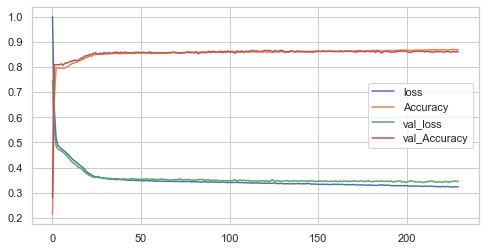

In [431]:
loss_df.plot();

In [432]:
model.evaluate(X_test, y_test, verbose=0)

[0.34285053610801697, 0.8529999852180481]

###  Prediction to see "confusion matrix" and "classification report"

In [433]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  
# 1 olma ihtimali 0.5 ten büyükse 1 yap
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[746  43]
 [104 107]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       789
           1       0.71      0.51      0.59       211

    accuracy                           0.85      1000
   macro avg       0.80      0.73      0.75      1000
weighted avg       0.84      0.85      0.84      1000



In [434]:
eval_metric(y_test, y_pred)

r2_score: 0.11700574847278056 
mae: 0.147 
mse: 0.147 
rmse: 0.38340579025361626


###  ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [435]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

32/32 [==============================] - 0s 1ms/step


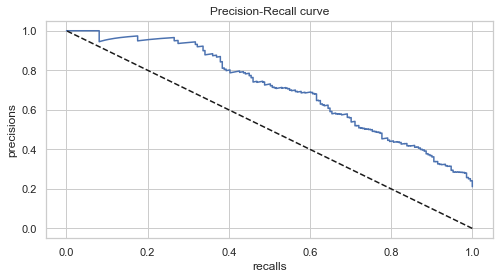

In [436]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1, 0], [0, 1], 'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()
# roc curve, sınıflandırma performansını gosterir

In [437]:
average_precision_score(y_test, y_pred_proba)

0.7086642122934683

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

<a href="https://androidkt.com/set-class-weight-for-imbalance-dataset-in-keras/" target="_blank">How to set class weight for imbalance dataset in Keras?</a>



### Create The Model

In [438]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Accuracy'])

In [439]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6272651240591023, 1: 2.4644030668127055}

In [440]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [441]:
model.fit(x=X_train,
          y=y_train,
          validation_split=0.15,
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/1000
50/50 [==============================] - 1s 4ms/step - loss: 0.7967 - Accuracy: 0.2080 - val_loss: 0.7882 - val_Accuracy: 0.2141
Epoch 2/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6765 - Accuracy: 0.3886 - val_loss: 0.6879 - val_Accuracy: 0.6104
Epoch 3/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6382 - Accuracy: 0.6409 - val_loss: 0.6601 - val_Accuracy: 0.6378
Epoch 4/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6179 - Accuracy: 0.6642 - val_loss: 0.6292 - val_Accuracy: 0.6622
Epoch 5/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.6033 - Accuracy: 0.6834 - val_loss: 0.6080 - val_Accuracy: 0.6793
Epoch 6/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5921 - Accuracy: 0.6933 - val_loss: 0.6179 - val_Accuracy: 0.6748
Epoch 7/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.5823 - Accuracy: 0.7024 - val_loss: 0.5987 - val_Accuracy: 0.6926
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 0.4721 - Accuracy: 0.7788 - val_loss: 0.4599 - val_Accuracy: 0.7889
Epoch 59/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4719 - Accuracy: 0.7765 - val_loss: 0.4566 - val_Accuracy: 0.7919
Epoch 60/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4724 - Accuracy: 0.7816 - val_loss: 0.4643 - val_Accuracy: 0.7844
Epoch 61/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4706 - Accuracy: 0.7816 - val_loss: 0.4705 - val_Accuracy: 0.7778
Epoch 62/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4700 - Accuracy: 0.7805 - val_loss: 0.4441 - val_Accuracy: 0.7963
Epoch 63/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4711 - Accuracy: 0.7838 - val_loss: 0.4976 - val_Accuracy: 0.7600
Epoch 64/1000
50/50 [==============================] - 0s 2ms/step - loss: 0.4693 - Accuracy: 0.7758 - val_loss: 0.4911 - val_Accuracy: 0.7652
Epoch 65/1000

In [442]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 16)                192       
                                                                 
 dense_84 (Dense)            (None, 8)                 136       
                                                                 
 dense_85 (Dense)            (None, 4)                 36        
                                                                 
 dense_86 (Dense)            (None, 1)                 5         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

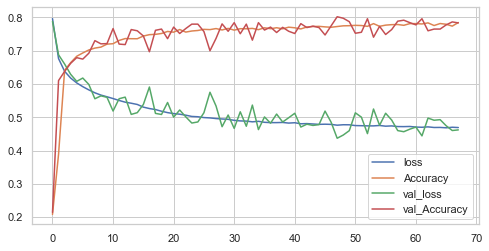

In [443]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [444]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# results without class 
#       precision    recall  f1-score   support
# 0       0.88      0.95      0.91       789
# 1       0.71      0.51      0.59       211

32/32 [==============================] - 0s 1ms/step
[[616 173]
 [ 54 157]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       789
           1       0.48      0.74      0.58       211

    accuracy                           0.77      1000
   macro avg       0.70      0.76      0.71      1000
weighted avg       0.83      0.77      0.79      1000



32/32 [==============================] - 0s 3ms/step


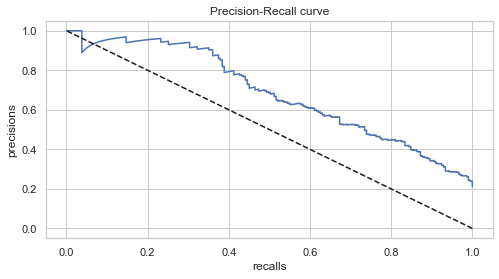

In [445]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1,0],[0,1],'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [446]:
average_precision_score(y_test, y_pred_proba) 
# result without class: 0.7086642122934683

0.6869478782108527

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

In [447]:
# from tensorflow.keras.optimizers import Adam

In [448]:
# tf.random.set_seed(seed)
# model = Sequential()
# model.add(Dense(16, activation='relu', input_dim=X_train.shape[1])) 
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['Accuracy'])

### Add Early Stop

In [449]:
# early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

#### Monitor the "val_loss" as metric

In [454]:
# model.fit(x=X_train,
#           y=y_train,
#           validation_split=0.15,
#           batch_size=Batch,
#           epochs=Epochs,
#           verbose=1,
#           callbacks=[early_stop])

 - model egitildikce val_loss degeri giderek dustu 

In [455]:
# loss_df = pd.DataFrame(model.history.history)
# loss_df.plot();

In [456]:
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print("loss : ", loss)
# print("accuracy : ", accuracy)

In [457]:
# y_pred = (model.predict(X_test) > 0.5).astype("int32")
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [458]:
# precision_recall_curve(y_test, y_pred_proba)

#### Monitor the "val_recall" as metric

## GridSearchCV

In [459]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD

In [460]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=4, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Accuracy'])
    return classifier

In [461]:
class_weights

{0: 0.6272651240591023, 1: 2.4644030668127055}

In [462]:
early_stop = EarlyStopping(monitor="val_loss", 
                           mode="auto",
                           verbose=1,
                           patience=20,
                           restore_best_weights=True)

In [464]:
tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}
grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=5,
                          n_jobs=-1,
                          verbose=0).fit(X_train,
                                         y_train,
                                         class_weight=class_weights)

<IPython.core.display.Javascript object>

Epoch 1/200
71/71 [==============================] - 1s 1ms/step - loss: 0.6632 - Accuracy: 0.5468
Epoch 2/200
71/71 [==============================] - 0s 1ms/step - loss: 0.6028 - Accuracy: 0.6888
Epoch 3/200
71/71 [==============================] - 0s 2ms/step - loss: 0.5779 - Accuracy: 0.7106
Epoch 4/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5601 - Accuracy: 0.7239
Epoch 5/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5450 - Accuracy: 0.7308
Epoch 6/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5302 - Accuracy: 0.7436
Epoch 7/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5184 - Accuracy: 0.7533
Epoch 8/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5141 - Accuracy: 0.7596
Epoch 9/200
71/71 [==============================] - 0s 1ms/step - loss: 0.5071 - Accuracy: 0.7603
Epoch 10/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4994 - Accuracy: 0.7637
Epoch 11/

71/71 [==============================] - 0s 1ms/step - loss: 0.4475 - Accuracy: 0.7979
Epoch 84/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4449 - Accuracy: 0.7988
Epoch 85/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4481 - Accuracy: 0.7997
Epoch 86/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4442 - Accuracy: 0.7984
Epoch 87/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4470 - Accuracy: 0.8008
Epoch 88/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4450 - Accuracy: 0.7994
Epoch 89/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4440 - Accuracy: 0.8017
Epoch 90/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4442 - Accuracy: 0.7982
Epoch 91/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4435 - Accuracy: 0.7998
Epoch 92/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4434 - Accuracy: 0.7998
Epoch 93/200


71/71 [==============================] - 0s 1ms/step - loss: 0.4359 - Accuracy: 0.8010
Epoch 165/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4341 - Accuracy: 0.8036
Epoch 166/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4361 - Accuracy: 0.8073
Epoch 167/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4346 - Accuracy: 0.8100
Epoch 168/200
71/71 [==============================] - 0s 2ms/step - loss: 0.4344 - Accuracy: 0.8004
Epoch 169/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4348 - Accuracy: 0.8051
Epoch 170/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4348 - Accuracy: 0.8037
Epoch 171/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4342 - Accuracy: 0.8043
Epoch 172/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4343 - Accuracy: 0.8047
Epoch 173/200
71/71 [==============================] - 0s 1ms/step - loss: 0.4328 - Accuracy: 0.8036
Epoc

In [465]:
grid_model.best_score_

0.8227777777777778

In [466]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [467]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values('rank_test_score')
grid_result

,mean_test_score,std_test_score,rank_test_score,params
6,0.8228,0.0223,1,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
25,0.8039,0.0116,2,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
10,0.7994,0.0181,3,"{'batch_size': 128, 'learn_rate': 0.005, 'opti..."
7,0.7964,0.0134,4,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
5,0.7931,0.0121,5,"{'batch_size': 128, 'learn_rate': 0.003, 'opti..."
2,0.7877,0.0085,6,"{'batch_size': 128, 'learn_rate': 0.001, 'opti..."
26,0.7877,0.0661,6,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."
20,0.7876,0.0077,8,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
22,0.7874,0.0222,9,"{'batch_size': 256, 'learn_rate': 0.003, 'opti..."
27,0.7814,0.0270,10,"{'batch_size': 256, 'learn_rate': 0.005, 'opti..."


In [468]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[662 127]
 [ 59 152]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       789
           1       0.54      0.72      0.62       211

    accuracy                           0.81      1000
   macro avg       0.73      0.78      0.75      1000
weighted avg       0.84      0.81      0.82      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 2ms/step


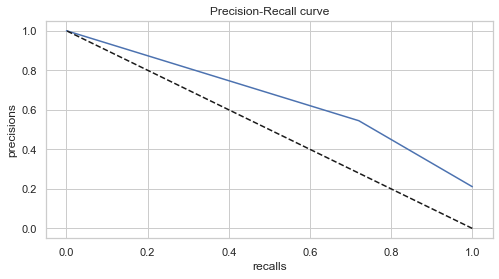

In [469]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.plot([1,0],[0,1],'k--')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [470]:
average_precision_score(y_test, y_pred_proba)

0.45146462484499483

In [471]:
roc_auc_score(y_test, y_pred_proba)

0.7797079511529982

# Final Model and Model Deployment

In [472]:
scaler = MinMaxScaler().fit(X)

In [473]:
import pickle
pickle.dump(scaler, open("scaler_churn_accuracy", 'wb'))

In [474]:
X_scaled = scaler.transform(X)

In [475]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [476]:
tf.random.set_seed(seed)

final_model = Sequential()
final_model.add(Dense(16, activation='relu'))
final_model.add(Dense(8, activation='relu'))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [477]:
final_model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=Batch,
          epochs=Epochs,
          verbose=1,
          class_weight=class_weights)    

Epoch 1/1000
59/59 [==============================] - 3s 16ms/step - loss: 0.6719 - accuracy: 0.5286 - val_loss: 0.6516 - val_accuracy: 0.6580
Epoch 2/1000
59/59 [==============================] - 0s 6ms/step - loss: 0.6402 - accuracy: 0.6602 - val_loss: 0.6292 - val_accuracy: 0.6790
Epoch 3/1000
59/59 [==============================] - 0s 6ms/step - loss: 0.6230 - accuracy: 0.6780 - val_loss: 0.6072 - val_accuracy: 0.6950
Epoch 4/1000
59/59 [==============================] - 0s 6ms/step - loss: 0.6117 - accuracy: 0.6813 - val_loss: 0.5998 - val_accuracy: 0.7060
Epoch 5/1000
59/59 [==============================] - 0s 6ms/step - loss: 0.6000 - accuracy: 0.6891 - val_loss: 0.5676 - val_accuracy: 0.7290
Epoch 6/1000
59/59 [==============================] - 0s 6ms/step - loss: 0.5882 - accuracy: 0.7014 - val_loss: 0.5659 - val_accuracy: 0.7350
Epoch 7/1000
59/59 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.7007 - val_loss: 0.5435 - val_accuracy: 0.7500
Epoch

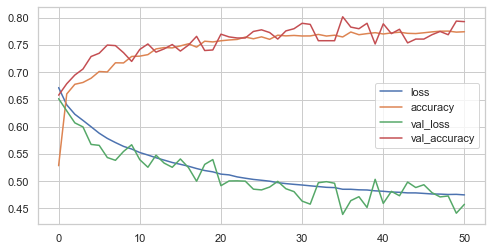

In [478]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot();

In [479]:
loss, recall = final_model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.45767995715141296
recall :  0.7929999828338623


In [480]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[629 160]
 [ 47 164]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       789
           1       0.51      0.78      0.61       211

    accuracy                           0.79      1000
   macro avg       0.72      0.79      0.74      1000
weighted avg       0.84      0.79      0.81      1000



In [481]:
final_model.save('model_churn_accuracy.h5')

## Loading Model

In [482]:
from tensorflow.keras.models import load_model

In [483]:
model_exited = load_model('model_churn_accuracy.h5')

In [484]:
scaler_fake_churn = pickle.load(open("scaler_churn_accuracy", "rb"))

## Prediction

In [485]:
sample = df.sample(n=20, random_state=101).iloc[0:20, :11]
sample
# ornegi dataframe olarak vermemiz lazim 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
6676,619,52,8,0.0000,2,1,1,123242.1100,0,0,1
6421,616,23,8,73112.9500,1,1,1,62733.0500,0,0,0
9834,516,46,6,62212.2900,1,0,1,171681.8600,1,0,0
8492,494,28,9,114731.7600,2,0,1,79479.7400,0,0,0
9982,655,46,7,137145.1200,1,1,0,115146.4000,1,1,0
8844,695,35,7,0.0000,2,1,0,160387.9800,0,0,1
7247,582,40,3,110150.4300,1,1,1,191757.6500,1,1,0
5862,682,40,4,0.0000,2,1,1,140745.9100,0,0,0
3662,632,28,5,118890.8100,1,0,1,145157.9700,0,0,0
3457,657,36,8,188241.0500,2,0,0,183058.5100,1,0,1


In [486]:
sample_scaled = scaler_fake_churn.transform(sample) # transform

In [487]:
# hali hazirda egitilmis modelden prediction aliyoruz 

prediction = pd.DataFrame(model_exited.predict(sample_scaled) > 0.5, columns=['prediction']).astype("float64")
prediction

1/1 [==============================] - 0s 95ms/step


,prediction
0,0.0000
1,0.0000
2,1.0000
3,0.0000
4,1.0000
5,0.0000
6,1.0000
7,0.0000
8,0.0000
9,0.0000


In [488]:
actual = pd.DataFrame(df.sample(n=20, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("float64")
actual 

,actual
6676,0.0000
6421,0.0000
9834,1.0000
8492,0.0000
9982,1.0000
8844,0.0000
7247,1.0000
5862,0.0000
3662,0.0000
3457,1.0000


In [489]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
6676,0.0000,0.0000
6421,0.0000,0.0000
9834,1.0000,1.0000
8492,0.0000,0.0000
9982,1.0000,1.0000
8844,0.0000,0.0000
7247,1.0000,1.0000
5862,0.0000,0.0000
3662,0.0000,0.0000
3457,1.0000,0.0000


In [490]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6676,0.0000,0.0000,TRUE
6421,0.0000,0.0000,TRUE
9834,1.0000,1.0000,TRUE
8492,0.0000,0.0000,TRUE
9982,1.0000,1.0000,TRUE
8844,0.0000,0.0000,TRUE
7247,1.0000,1.0000,TRUE
5862,0.0000,0.0000,TRUE
3662,0.0000,0.0000,TRUE
3457,1.0000,0.0000,FALSE


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___